# Old World Simulation With Greedy Attack


In [1]:
# Add the project base directory to the path
import os
import sys
project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)
# Import GUARD
from guard import World, analysis, default_parameters, generate_parameters

In [2]:
def simulation(world, n_sim):
    imperial_density = []
    
    for sim in range(n_sim):
        world.reset()
        imperial_density.append(analysis.ImperialDensity(world))
        for step in range(1500):
            world.step()
            imperial_density[sim].sample()
            if (world.step_number)%100 == 0:
                print('simulation: {:2d}\tstep: {:4d}'.format(sim+1,world.step_number))
            
    return imperial_density

In [5]:
params = generate_parameters(attack_method='entropy_maximisation')
world = World.from_file(project_dir+'/data/old_world.yml', params)

# Check if simulation has been run before
if os.path.isfile('./imperial_density.pkl'):
    mean_impd = analysis.ImperialDensity.from_file(world, './imperial_density.pkl')
else:
    imperial_density = simulation(world, 20)
    mean_impd = analysis.ImperialDensity.mean(imperial_density)
    mean_impd.dump('./imperial_density.pkl')

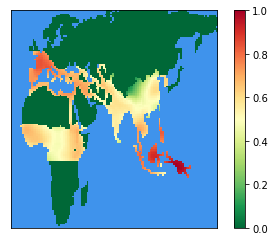

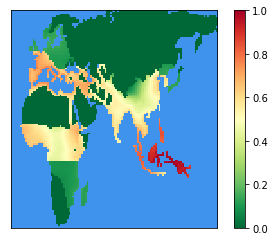

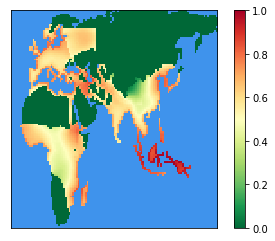

In [6]:
mean_impd.plot_all()

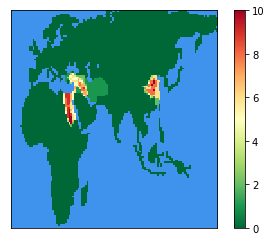

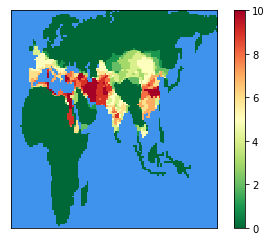

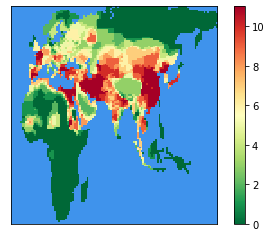

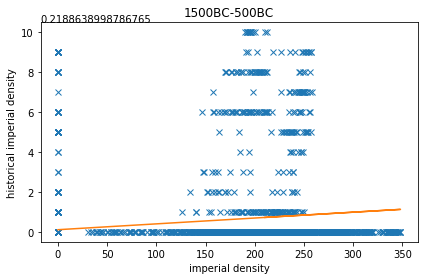

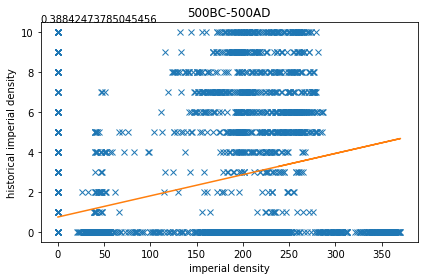

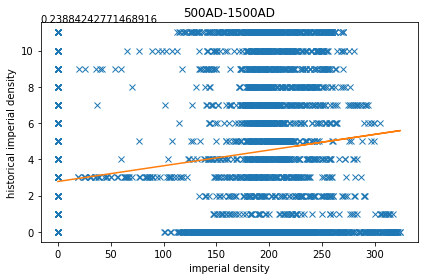

In [7]:
# Correlate with historical data
historical = analysis.HistoricalImperialDensity(world, data_file=project_dir+'/data/imperial_density_data.pkl')

historical.plot_heatmap()

historical.correlate(mean_impd)